In [1]:
# Edges is found by a rapid change in the image intensity function.
# When you apply derivative, you get the rate of change. 
# Since there are two dimensions in an image (x and y),
# we take the partial derivatves with respect to each of the dimensions.
# a = df(x,y) / dx
# b = df(x,y) / dy
# ∇f = [a, b] --> Gradient of the image
# Amount of change is the magnitude of ∇f 
# c = sqrt(a^2 + b^2)
# c gives us the edge of the image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

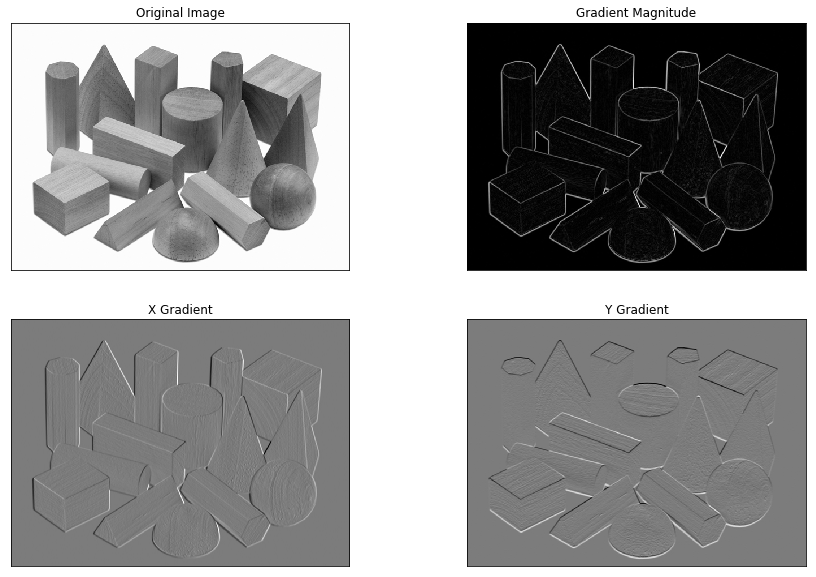

In [3]:
img = cv2.imread('../images/3dshapes.jpg', 0)

# Differential Operator (Sobel Operator)
# When applied to the image, return the derivatives
x_sobel = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]] / np.float32(8)
y_sobel = np.transpose(x_sobel)

# Model these operators as masks/kernels that compute the image gradient function
x_gradient = cv2.filter2D(img, cv2.CV_64F, x_sobel)
y_gradient = cv2.filter2D(img, cv2.CV_64F, y_sobel)

# Magnitude of the gradients. c = sqrt(a^2 + b^2)
gradient_magnitude = np.sqrt(x_gradient**2 + y_gradient**2)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(x_gradient, cmap='gray')
plt.title('X Gradient'), plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(y_gradient, cmap='gray')
plt.title('Y Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

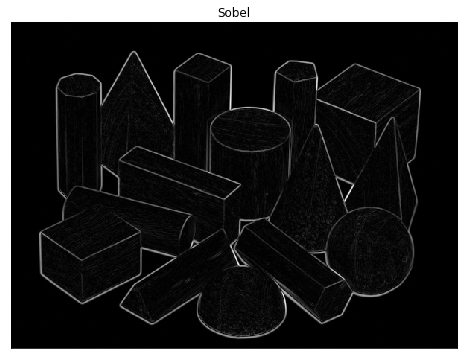

In [17]:
# Let's use OpenCV Sobel/Scharr function
img = cv2.imread('../images/3dshapes.jpg', 0)

# cv2.Sobel(image, ddepth, dx, dy, kernel size)
# or
# cv2.Scharr(image, ddepth, dx, dy, kernel size)
x_gradient = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
y_gradient = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)

# magnitude, angle(in rad) =  cv2.cartToPolar(x, y)
magnitude, _ = cv2.cartToPolar(x_gradient, y_gradient)

plt.figure(figsize=(8,8))
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

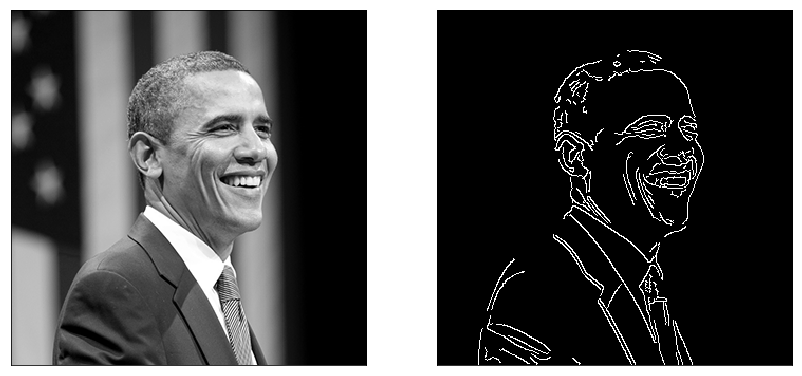

In [262]:
# Let's try using Canny Edge Detection

img = cv2.imread('../images/obama.jpg', 0)

# We blur the image a little bit to get rid of noisy areas
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# cv2.Canny(image, lower threshold, higher threshold)
img_canny = cv2.Canny(blurred, 100, 150)

plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_canny, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()